In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ml_library import NeuralNetwork , z_score_normalization , train_test_split , one_hot_encode

In [14]:
df = pd.read_csv('./dataset/train_nn.csv')
df_test = pd.read_csv('./dataset/test_nn.csv')

df.shape , df_test.shape

((16000, 23), (4000, 21))

In [15]:
df.columns

Index(['Unnamed: 0', 'F_1', 'F_2', 'F_3', 'F_4', 'F_5', 'F_6', 'F_7', 'F_8',
       'F_9', 'F_10', 'F_11', 'F_12', 'F_13', 'F_14', 'F_15', 'F_16', 'F_17',
       'F_18', 'F_19', 'F_20', 'target_cls', 'target_reg'],
      dtype='object')

In [16]:
df_test.columns

Index(['Unnamed: 0', 'F_1', 'F_2', 'F_3', 'F_4', 'F_5', 'F_6', 'F_7', 'F_8',
       'F_9', 'F_10', 'F_11', 'F_12', 'F_13', 'F_14', 'F_15', 'F_16', 'F_17',
       'F_18', 'F_19', 'F_20'],
      dtype='object')

In [17]:
df.sample(5)

,Unnamed: 0,F_1,F_2,F_3,F_4,F_5,F_6,F_7,F_8,F_9,...,F_13,F_14,F_15,F_16,F_17,F_18,F_19,F_20,target_cls,target_reg
3277,3277,3,9,4,6,2,7,7,14,2,...,6,8,0,8,12.56,2.50,6.03,145.5,14,6.72
12490,12490,1,3,3,2,1,7,9,4,3,...,1,9,2,8,9.42,3.75,2.01,41.7,16,4.26
3233,3233,5,10,4,5,3,6,6,6,2,...,5,9,4,8,12.56,2.50,6.70,64.2,15,7.62
12898,12898,3,9,4,6,3,7,7,8,6,...,2,8,3,8,12.56,7.50,6.03,84.3,15,7.12
14532,14532,2,10,3,8,1,12,3,10,3,...,1,6,0,8,9.42,3.75,6.70,105.0,10,6.58


In [18]:
df['target_cls'].value_counts().sort_index()

target_cls
1     640
2     613
3     599
4     649
5     627
6     635
7     613
8     590
9     609
10    598
11    609
12    606
13    624
14    632
15    608
16    630
17    617
18    598
19    577
20    633
21    630
22    606
23    604
24    633
25    618
26    602
Name: count, dtype: int64

In [19]:
X = df.drop(columns=["target_cls", "target_reg", "Unnamed: 0"], axis=1).values
y = df["target_cls"].values

y_onehot = one_hot_encode(y)

X_test = df_test.drop("Unnamed: 0", axis=1).values
X.shape, y.shape

((16000, 20), (16000,))

In [20]:
X_train, X_val, y_train, y_val = train_test_split(X, y_onehot, test_size=0.2)
X_train = z_score_normalization(X_train)
X_val = z_score_normalization(X_val)
X_test = z_score_normalization(X_test)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((12800, 20), (3200, 20), (12800, 27), (3200, 27))

In [21]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(12800, 27))

In [22]:
X_test.shape

(4000, 20)

In [23]:
num_of_class = len(np.unique(y))

In [24]:
nn = NeuralNetwork(
    learning_rate=0.01,
    epochs=2000,
    loss_function="categorical_cross_entropy",
    initialization="he",
    optimizer="adam",
)

model = nn.Sequential(
    nn.Dense(100, activation="relu"),
    nn.Dense(50, activation="relu"),
    nn.Dense(27, activation="softmax"),  # num_classes
)

nn.fit(X_train, y_train, model)

Epoch 0: Loss 4.154521633546086
Epoch 200: Loss 0.04576551850674553
Epoch 400: Loss 0.006763234416721502
Epoch 600: Loss 0.002230702442244861
Epoch 800: Loss 0.0010743227967621033
Epoch 1000: Loss 0.0006211288841378756
Epoch 1200: Loss 0.00040040004874637437
Epoch 1400: Loss 0.00027762397568416005
Epoch 1600: Loss 0.00020230483642207678
Epoch 1800: Loss 0.00015268089773245587


{'layers': ({'units': 100, 'activation': 'relu'},
  {'units': 50, 'activation': 'relu'},
  {'units': 27, 'activation': 'softmax'}),
 'parameters': {'w1': array([[-1.13066023, -0.67539361, -0.29377036, ..., -1.14205329,
           0.31620454, -0.94150991],
         [-0.33366462, -0.55554066,  0.51078197, ..., -0.44576507,
          -0.10945943, -0.14138478],
         [ 0.4664065 ,  0.03169393,  0.50563284, ...,  0.48414175,
           0.14595129,  0.65928462],
         ...,
         [-0.82496084, -0.06895546,  1.12908065, ...,  0.15806543,
           1.46334432, -1.08989929],
         [-0.44932429,  0.29981013, -0.00755227, ..., -0.16317019,
           1.17043049,  0.09537839],
         [-1.34286069, -0.37533319, -0.07281939, ..., -0.19728247,
           0.53640782, -0.63350991]], shape=(20, 100)),
  'b1': array([[ 0.22797602,  0.37151864, -0.3252494 ,  0.01176476,  1.31404396,
           0.75042589,  0.1460312 , -0.1346464 ,  0.35665992, -0.00982994,
           1.41422088,  0.75126238,

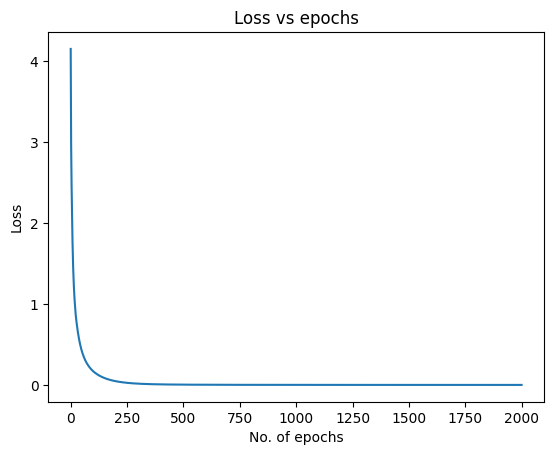

In [31]:
nn.plot_loss()

In [32]:
y_pred = nn.predict(X_val , model)
y_pred

array([[1.83064607e-33, 4.68098043e-13, 2.62423948e-21, ...,
        9.99999929e-01, 7.49503014e-20, 1.09782569e-20],
       [3.93726920e-37, 3.92020401e-20, 2.61752583e-34, ...,
        6.89102000e-30, 9.44731556e-17, 2.16605435e-55],
       [2.52883423e-61, 2.91061529e-54, 4.87954623e-33, ...,
        9.38930439e-38, 2.97509690e-45, 5.09165671e-28],
       ...,
       [4.36593157e-34, 8.74799003e-33, 9.99956723e-01, ...,
        1.75967238e-32, 2.27221233e-32, 1.05215209e-22],
       [7.92283024e-85, 7.21761020e-42, 2.38518421e-83, ...,
        8.05797096e-42, 1.85647866e-29, 2.91018444e-89],
       [3.23280139e-55, 4.12736439e-34, 6.64755605e-20, ...,
        8.91375719e-17, 2.42830569e-28, 9.99999997e-01]], shape=(3200, 27))

In [33]:
y_pred_class = np.argmax(y_pred, axis=1)  # convert softmax → class label
y_true_class = np.argmax(y_val, axis=1)

In [34]:
y_pred_class

array([24, 21,  7, ...,  2, 20, 26], shape=(3200,))

In [35]:
y_true_class

array([24, 21,  7, ...,  2, 20, 26], shape=(3200,))

In [37]:
nn.evaluation_metrics(y_true_class, y_pred_class)

TypeError: precision_score() got an unexpected keyword argument 'average'